# IESB - Miner II - Aula 04 - Random Forest

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
# Carregando os dados
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.shape

(7043, 21)

In [3]:
# Olhando os dados
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
# Olhando os dados aleatoriamente
df.sample(5).T

,4796,5940,4908,4433,6695
customerID,3807-BPOMJ,9711-FJTBX,3957-LXOLK,4749-OJKQU,6253-GNHWH
gender,Female,Male,Female,Female,Female
SeniorCitizen,0,0,1,0,0
Partner,Yes,Yes,No,No,Yes
Dependents,No,Yes,No,No,Yes
tenure,55,56,28,4,71
PhoneService,Yes,Yes,Yes,Yes,Yes
MultipleLines,No,No,Yes,Yes,Yes
InternetService,Fiber optic,Fiber optic,Fiber optic,Fiber optic,DSL
OnlineSecurity,Yes,No,No,No,Yes


In [5]:
# Verificando os tipos dos dados e os tamanhos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Convertendo a coluna TotalCharges para float
df['TotalCharges'] = df['TotalCharges'].astype(float)

ValueError: could not convert string to float: 

In [7]:
# Vamos identificar os valores em branco na coluna TotalCharges
df[df['TotalCharges'].str.contains(' ')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
# Para corrigir o TotalCharges vamos trocar o espaço em branco
# pelo valor ZERO e forçar novamente a conversão
df['TotalCharges'] = df['TotalCharges'].str.replace(' ', '0').astype(float)

# df['TotalCharges'] = df['TotalCharges'].str.strip().replace('', '0').astype(float)

In [9]:
# Verificando novamente os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# Copiando o dataframe
df2 = df.copy()

In [11]:
# Criando variaveis dummy para gender
pd.get_dummies(df['gender'])

,Female,Male
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
7038,0,1
7039,1,0
7040,1,0
7041,0,1


In [12]:
# Dummy da coluna PaymentMethod
pd.get_dummies(df['PaymentMethod'])

,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
7038,0,0,0,1
7039,0,1,0,0
7040,0,0,1,0
7041,0,0,0,1


In [13]:
# Criando dummys para todas as colunas
df = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents',
                                'PhoneService', 'MultipleLines',
                                'InternetService', 'OnlineSecurity',
                                'OnlineBackup', 'DeviceProtection',
                                'TechSupport', 'StreamingTV',
                                'StreamingMovies', 'Contract',
                                'PaperlessBilling', 'PaymentMethod'])

In [14]:
df.shape

(7043, 47)

In [15]:
# olhando os dados
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
SeniorCitizen,0,0,0,0,0
tenure,1,34,2,45,2
MonthlyCharges,29.85,56.95,53.85,42.30,70.70
TotalCharges,29.85,1889.50,108.15,1840.75,151.65
Churn,No,No,Yes,No,Yes
gender_Female,1,0,0,0,1
gender_Male,0,1,1,1,0
Partner_No,0,1,1,1,1
Partner_Yes,1,0,0,0,0


In [16]:
# Vrificando novamente os tipos dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   tenure                                   7043 non-null   int64  
 3   MonthlyCharges                           7043 non-null   float64
 4   TotalCharges                             7043 non-null   float64
 5   Churn                                    7043 non-null   object 
 6   gender_Female                            7043 non-null   uint8  
 7   gender_Male                              7043 non-null   uint8  
 8   Partner_No                               7043 non-null   uint8  
 9   Partner_Yes                              7043 non-null   uint8  
 10  Dependents_No                            7043 no

In [17]:
# Treinamento do modelo

# Separando o dataframe

# Importando o train_test_split
from sklearn.model_selection import train_test_split

# Separando treino e teste
train, test = train_test_split(df, test_size=0.20, random_state=42)

# Separando treino e validação
train, valid = train_test_split(train, test_size=0.20, random_state=42)

train.shape, valid.shape, test.shape

((4507, 47), (1127, 47), (1409, 47))

In [18]:
# definindo colunas de entrada
feats = [c for c in df.columns if c not in ['customerID', 'Churn']]

feats

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Female',
 'gender_Male',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank tran

In [19]:
# treinar o modelo

# Importando o modelo
from sklearn.ensemble import RandomForestClassifier

# Instanciar o modelo
rf = RandomForestClassifier(n_estimators=200, random_state=42)

In [20]:
# treinar o modelo
rf.fit(train[feats], train['Churn'])

RandomForestClassifier(n_estimators=200, random_state=42)

In [21]:
# Prevendo os dados de validação
preds_val = rf.predict(valid[feats])

preds_val

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [22]:
# Avaliando o desempenho do modelo

# Importando a metrica
from sklearn.metrics import accuracy_score

In [23]:
# Acurácia das previsões de validação
accuracy_score(valid['Churn'], preds_val)

0.7888198757763976

In [24]:
# Medindo a acurácia nos dados de teste
preds_test = rf.predict(test[feats])

accuracy_score(test['Churn'], preds_test)

0.794889992902768

In [25]:
# Olhando a coluna Churn do dataframe completo
df['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [26]:
# Olhando a coluna Churn do dataframe completo
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
# Tipo category no pandas
df2['gender'].astype('category').cat.categories

Index(['Female', 'Male'], dtype='object')

In [29]:
df2['gender'].astype('category').cat.codes

0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Length: 7043, dtype: int8

In [30]:
df2['PaymentMethod'].astype('category').cat.codes

0       2
1       3
2       3
3       0
4       2
       ..
7038    3
7039    1
7040    2
7041    3
7042    0
Length: 7043, dtype: int8

In [31]:
df2['PaymentMethod'].astype('category').cat.categories

Index(['Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check'],
      dtype='object')

In [32]:
# Convertendo as colunas categórias em colunas numéricas
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col] = df2[col].astype('category').cat.codes

In [33]:
# Verificando novamente os tipos
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int16  
 1   gender            7043 non-null   int8   
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int8   
 4   Dependents        7043 non-null   int8   
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int8   
 7   MultipleLines     7043 non-null   int8   
 8   InternetService   7043 non-null   int8   
 9   OnlineSecurity    7043 non-null   int8   
 10  OnlineBackup      7043 non-null   int8   
 11  DeviceProtection  7043 non-null   int8   
 12  TechSupport       7043 non-null   int8   
 13  StreamingTV       7043 non-null   int8   
 14  StreamingMovies   7043 non-null   int8   
 15  Contract          7043 non-null   int8   
 16  PaperlessBilling  7043 non-null   int8   


In [34]:
# Separando o dataframe em train, valid e test

# Primeiro, train e test
train, test = train_test_split(df2, test_size=0.2, random_state=42)

# Depois, train e valid
train, valid = train_test_split(train, test_size=0.2, random_state=42)

train.shape, valid.shape, test.shape

((4507, 21), (1127, 21), (1409, 21))

In [35]:
# Colunas a serem usadas para treino
feats2 = [c for c in df2.columns if c not in ['customerID', 'Churn']]

In [36]:
# Instanciando o modelo
rf2 = RandomForestClassifier(n_estimators=200, random_state=42)

# Treinando o modelo
rf2.fit(train[feats2], train['Churn'])

RandomForestClassifier(n_estimators=200, random_state=42)

In [37]:
# previsões para os dados de validação
preds_val = rf2.predict(valid[feats2])

# Verificando a acurácia
accuracy_score(valid['Churn'], preds_val)

0.7905944986690329

In [38]:
# Previsões para os dados de teste
preds_test = rf2.predict(test[feats2])

# Verificando a acurácia
accuracy_score(test['Churn'], preds_test)

0.7906316536550745

<AxesSubplot:>

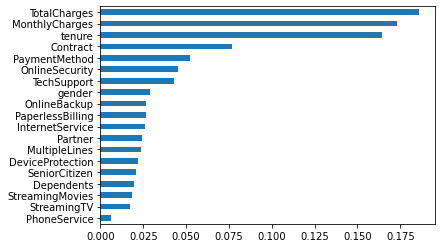

In [39]:
# Avaliando a importancia de cada coluna (cada variável de entrada)
pd.Series(rf2.feature_importances_, index=feats2).sort_values().plot.barh()

<AxesSubplot:>

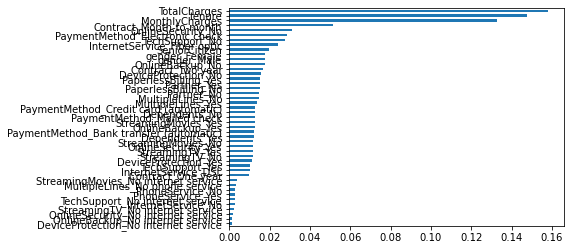

In [40]:
# Avaliando a importancia de cada coluna no RF1 (cada variável de entrada)
pd.Series(rf.feature_importances_, index=feats).sort_values().plot.barh()

In [41]:
# importando a bilbioteca para plotar o gráfico de Matriz de Confusão
import scikitplot as skplt

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

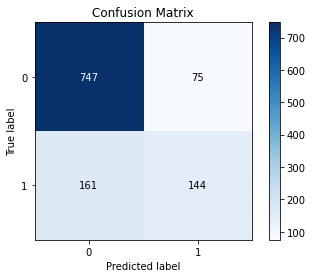

In [42]:
# Matriz de Confusão - Dados de Validação
skplt.metrics.plot_confusion_matrix(valid['Churn'], preds_val)